# Skin_Cancer_Detection using CNN

# Step 1: Importing Essential Libraries

In [32]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Step 2: Loading data and Making labels

In [33]:
#dataset from kaggle
path='hmnist_28_28_RGB.csv'

In [34]:
df=pd.read_csv(path)

In [35]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


# Step 3: Train Test Split

In [5]:
fractions=np.array([0.8,0.2])

df=df.sample(frac=1)

train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [6]:
print(len(train_set))

8012


In [7]:
print(len(test_set))

2003


In [8]:
df.label.unique()

array([4, 1, 0, 2, 6, 5, 3], dtype=int64)

In [9]:
# reference: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000/discussion/183083
classes={
    0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),

    1:('bcc' , 'basal cell carcinoma'),

    2:('bkl', 'benign keratosis-like lesions'),

    3:('df', 'dermatofibroma'),

    4:('nv', ' melanocytic nevi'),

    5:('vasc', ' pyogenic granulomas and hemorrhage'),

    6:('mel', 'melanoma'),
}

In [10]:
y_train=train_set['label']

x_train=train_set.drop(columns=['label'])

y_test=test_set['label']

x_test=test_set.drop(columns=['label'])

columns=list(x_train)

# Step 4: Exploratory Data Analysis and Preprocessing

In [13]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()

x_train,y_train  = oversample.fit_resample(x_train,y_train)

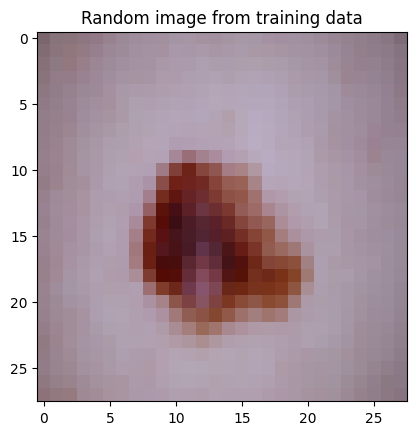

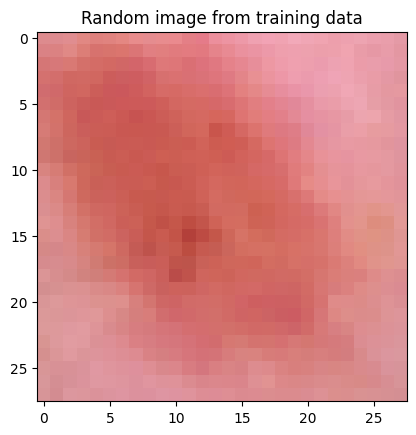

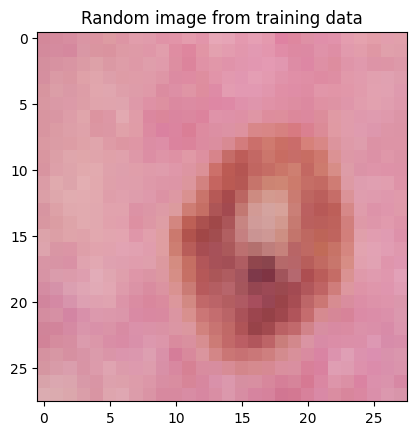

In [15]:
import matplotlib.pyplot as plt
import random

num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

# Step 5: Model Building (CNN)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [17]:
%time

model = Sequential()

model.add(Conv2D(16,
                 kernel_size = (3,3),
                 input_shape = (28, 28, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(256,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: total: 0 ns
Wall time: 0 ns
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 

# Step 6: Setting Optimizer & Annealing

---



In [18]:
#reference: https://www.kaggle.com/dhruv1234/ham10000-skin-disease-classification

callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                              monitor='val_acc',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [19]:
%time

optimizer=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: total: 0 ns
Wall time: 0 ns


# Step 7: Fitting the model

In [20]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/50
234/235 [============================>.] - ETA: 0s - loss: 1.1615 - accuracy: 0.5856WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 24s 85ms/step - loss: 1.1615 - accuracy: 0.5856 - val_loss: 2.0848 - val_accuracy: 0.2864
Epoch 2/50
234/235 [============================>.] - ETA: 0s - loss: 0.5008 - accuracy: 0.8343WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 81ms/step - loss: 0.5010 - accuracy: 0.8343 - val_loss: 1.5263 - val_accuracy: 0.4043
Epoch 3/50
234/235 [============================>.] - ETA: 0s - loss: 0.2995 - accuracy: 0.9001WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 81ms/step - loss: 0.2994 - accuracy: 0.9001 - val_loss: 1.3044 - val_accuracy: 0.4915
Epoch 4/50
234/235 [============================>.] - ETA: 0s - loss: 0.2398 - accuracy: 0.9215WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 17s 74ms/step - loss: 0.2398 - accuracy: 0.9214 - val_loss: 1.7374 - val_accuracy: 0.4445
Epoch 5/50
234/235 [============================>.] - ETA: 0s - loss: 0.2307 - accuracy: 0.9239WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 83ms/step - loss: 0.2308 - accuracy: 0.9239 - val_loss: 0.9592 - val_accuracy: 0.5514
Epoch 6/50
234/235 [============================>.] - ETA: 0s - loss: 0.1758 - accuracy: 0.9427WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 20s 83ms/step - loss: 0.1757 - accuracy: 0.9428 - val_loss: 1.0336 - val_accuracy: 0.5640
Epoch 7/50
234/235 [============================>.] - ETA: 0s - loss: 0.1200 - accuracy: 0.9589WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 80ms/step - loss: 0.1203 - accuracy: 0.9588 - val_loss: 1.2585 - val_accuracy: 0.4933
Epoch 8/50
234/235 [============================>.] - ETA: 0s - loss: 0.1260 - accuracy: 0.9574WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 81ms/step - loss: 0.1261 - accuracy: 0.9574 - val_loss: 1.5365 - val_accuracy: 0.4841
Epoch 9/50
234/235 [============================>.] - ETA: 0s - loss: 0.1256 - accuracy: 0.9574WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 75ms/step - loss: 0.1260 - accuracy: 0.9574 - val_loss: 1.0890 - val_accuracy: 0.5330
Epoch 10/50
234/235 [============================>.] - ETA: 0s - loss: 0.1354 - accuracy: 0.9551WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 80ms/step - loss: 0.1355 - accuracy: 0.9551 - val_loss: 0.5416 - val_accuracy: 0.7435
Epoch 11/50
234/235 [============================>.] - ETA: 0s - loss: 0.1031 - accuracy: 0.9651WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 21s 89ms/step - loss: 0.1033 - accuracy: 0.9651 - val_loss: 0.4460 - val_accuracy: 0.8081
Epoch 12/50
234/235 [============================>.] - ETA: 0s - loss: 0.0926 - accuracy: 0.9685WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 21s 89ms/step - loss: 0.0926 - accuracy: 0.9686 - val_loss: 0.5161 - val_accuracy: 0.7407
Epoch 13/50
234/235 [============================>.] - ETA: 0s - loss: 0.0679 - accuracy: 0.9760WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 21s 90ms/step - loss: 0.0681 - accuracy: 0.9760 - val_loss: 0.5847 - val_accuracy: 0.7487
Epoch 14/50
234/235 [============================>.] - ETA: 0s - loss: 0.0697 - accuracy: 0.9778WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 81ms/step - loss: 0.0697 - accuracy: 0.9778 - val_loss: 0.3927 - val_accuracy: 0.8059
Epoch 15/50
234/235 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9813WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 82ms/step - loss: 0.0543 - accuracy: 0.9813 - val_loss: 0.7014 - val_accuracy: 0.7397
Epoch 16/50
234/235 [============================>.] - ETA: 0s - loss: 0.1515 - accuracy: 0.9535WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 79ms/step - loss: 0.1516 - accuracy: 0.9535 - val_loss: 0.5185 - val_accuracy: 0.7570
Epoch 17/50
234/235 [============================>.] - ETA: 0s - loss: 0.0804 - accuracy: 0.9736WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 17s 74ms/step - loss: 0.0807 - accuracy: 0.9736 - val_loss: 0.2748 - val_accuracy: 0.8919
Epoch 18/50
234/235 [============================>.] - ETA: 0s - loss: 0.0858 - accuracy: 0.9735WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 75ms/step - loss: 0.0862 - accuracy: 0.9734 - val_loss: 0.2896 - val_accuracy: 0.8744
Epoch 19/50
234/235 [============================>.] - ETA: 0s - loss: 0.0759 - accuracy: 0.9752WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 75ms/step - loss: 0.0759 - accuracy: 0.9751 - val_loss: 0.4646 - val_accuracy: 0.8091
Epoch 20/50
234/235 [============================>.] - ETA: 0s - loss: 0.0493 - accuracy: 0.9845WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 80ms/step - loss: 0.0503 - accuracy: 0.9843 - val_loss: 0.6637 - val_accuracy: 0.7578
Epoch 21/50
234/235 [============================>.] - ETA: 0s - loss: 0.1048 - accuracy: 0.9680WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 77ms/step - loss: 0.1049 - accuracy: 0.9680 - val_loss: 0.2731 - val_accuracy: 0.8840
Epoch 22/50
234/235 [============================>.] - ETA: 0s - loss: 0.0457 - accuracy: 0.9858WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 75ms/step - loss: 0.0456 - accuracy: 0.9858 - val_loss: 0.0910 - val_accuracy: 0.9617
Epoch 23/50
234/235 [============================>.] - ETA: 0s - loss: 0.0255 - accuracy: 0.9917WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 20s 84ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.1024 - val_accuracy: 0.9551
Epoch 24/50
234/235 [============================>.] - ETA: 0s - loss: 0.0449 - accuracy: 0.9853WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 20s 84ms/step - loss: 0.0450 - accuracy: 0.9853 - val_loss: 0.6734 - val_accuracy: 0.7457
Epoch 25/50
234/235 [============================>.] - ETA: 0s - loss: 0.0479 - accuracy: 0.9847WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 20s 84ms/step - loss: 0.0483 - accuracy: 0.9846 - val_loss: 0.2391 - val_accuracy: 0.9003
Epoch 26/50
234/235 [============================>.] - ETA: 0s - loss: 0.0387 - accuracy: 0.9871WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 82ms/step - loss: 0.0387 - accuracy: 0.9871 - val_loss: 0.0818 - val_accuracy: 0.9702
Epoch 27/50
234/235 [============================>.] - ETA: 0s - loss: 0.0185 - accuracy: 0.9938WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 77ms/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.1890 - val_accuracy: 0.9284
Epoch 28/50
234/235 [============================>.] - ETA: 0s - loss: 0.0306 - accuracy: 0.9902WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 76ms/step - loss: 0.0306 - accuracy: 0.9902 - val_loss: 0.6930 - val_accuracy: 0.7854
Epoch 29/50
234/235 [============================>.] - ETA: 0s - loss: 0.0659 - accuracy: 0.9801WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 80ms/step - loss: 0.0659 - accuracy: 0.9801 - val_loss: 0.1090 - val_accuracy: 0.9579
Epoch 30/50
234/235 [============================>.] - ETA: 0s - loss: 0.0159 - accuracy: 0.9951WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 83ms/step - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.1317 - val_accuracy: 0.9545
Epoch 31/50
234/235 [============================>.] - ETA: 0s - loss: 0.0195 - accuracy: 0.9943WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 20s 84ms/step - loss: 0.0195 - accuracy: 0.9943 - val_loss: 0.3202 - val_accuracy: 0.8850
Epoch 32/50
234/235 [============================>.] - ETA: 0s - loss: 0.0215 - accuracy: 0.9931WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 75ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.4588 - val_accuracy: 0.8575
Epoch 33/50
234/235 [============================>.] - ETA: 0s - loss: 0.0422 - accuracy: 0.9870WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 17s 74ms/step - loss: 0.0422 - accuracy: 0.9870 - val_loss: 0.1680 - val_accuracy: 0.9348
Epoch 34/50
234/235 [============================>.] - ETA: 0s - loss: 0.0170 - accuracy: 0.9946WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 76ms/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.0475 - val_accuracy: 0.9826
Epoch 35/50
234/235 [============================>.] - ETA: 0s - loss: 0.0214 - accuracy: 0.9932WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 17s 74ms/step - loss: 0.0214 - accuracy: 0.9932 - val_loss: 0.2082 - val_accuracy: 0.9270
Epoch 36/50
234/235 [============================>.] - ETA: 0s - loss: 0.0171 - accuracy: 0.9947WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 78ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.3541 - val_accuracy: 0.8829
Epoch 37/50
234/235 [============================>.] - ETA: 0s - loss: 0.0697 - accuracy: 0.9806WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 78ms/step - loss: 0.0697 - accuracy: 0.9806 - val_loss: 0.0938 - val_accuracy: 0.9555
Epoch 38/50
234/235 [============================>.] - ETA: 0s - loss: 0.0198 - accuracy: 0.9940WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 79ms/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.0889 - val_accuracy: 0.9674
Epoch 39/50
234/235 [============================>.] - ETA: 0s - loss: 0.0430 - accuracy: 0.9860WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 77ms/step - loss: 0.0431 - accuracy: 0.9860 - val_loss: 0.1394 - val_accuracy: 0.9565
Epoch 40/50
234/235 [============================>.] - ETA: 0s - loss: 0.0138 - accuracy: 0.9958WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 75ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0147 - val_accuracy: 0.9965
Epoch 41/50
234/235 [============================>.] - ETA: 0s - loss: 0.0606 - accuracy: 0.9821WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 82ms/step - loss: 0.0607 - accuracy: 0.9821 - val_loss: 0.2826 - val_accuracy: 0.9027
Epoch 42/50
234/235 [============================>.] - ETA: 0s - loss: 0.0261 - accuracy: 0.9920WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 76ms/step - loss: 0.0261 - accuracy: 0.9920 - val_loss: 0.1022 - val_accuracy: 0.9619
Epoch 43/50
234/235 [============================>.] - ETA: 0s - loss: 0.0579 - accuracy: 0.9814WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 78ms/step - loss: 0.0585 - accuracy: 0.9812 - val_loss: 0.1116 - val_accuracy: 0.9621
Epoch 44/50
234/235 [============================>.] - ETA: 0s - loss: 0.1486 - accuracy: 0.9553WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 79ms/step - loss: 0.1485 - accuracy: 0.9553 - val_loss: 0.1277 - val_accuracy: 0.9425
Epoch 45/50
234/235 [============================>.] - ETA: 0s - loss: 0.0225 - accuracy: 0.9929WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 17s 74ms/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.0356 - val_accuracy: 0.9901
Epoch 46/50
234/235 [============================>.] - ETA: 0s - loss: 0.0463 - accuracy: 0.9865WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 18s 77ms/step - loss: 0.0464 - accuracy: 0.9864 - val_loss: 0.0618 - val_accuracy: 0.9741
Epoch 47/50
234/235 [============================>.] - ETA: 0s - loss: 0.0266 - accuracy: 0.9918WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 17s 74ms/step - loss: 0.0267 - accuracy: 0.9918 - val_loss: 0.0974 - val_accuracy: 0.9646
Epoch 48/50
234/235 [============================>.] - ETA: 0s - loss: 0.0175 - accuracy: 0.9947WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 17s 74ms/step - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.0162 - val_accuracy: 0.9965
Epoch 49/50
234/235 [============================>.] - ETA: 0s - loss: 0.0096 - accuracy: 0.9970WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 19s 81ms/step - loss: 0.0097 - accuracy: 0.9970 - val_loss: 0.0310 - val_accuracy: 0.9893
Epoch 50/50
234/235 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9979WARNING:tensorflow:Can save best model only with val_acc available, skipping.


235/235 [==============================] - 17s 74ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.0601 - val_accuracy: 0.9805
Duration: 0:15:34.288180


# Step 8: Model Evaluation

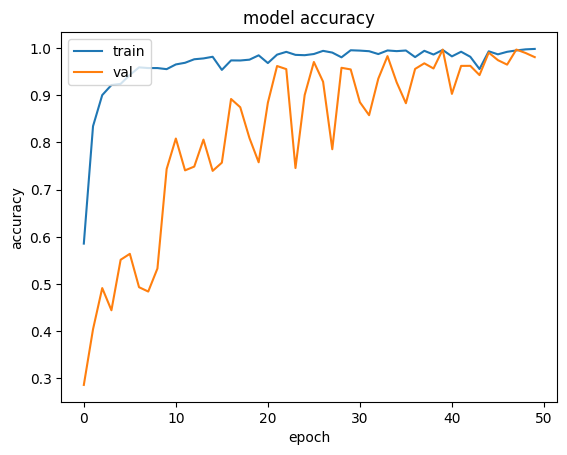

In [21]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

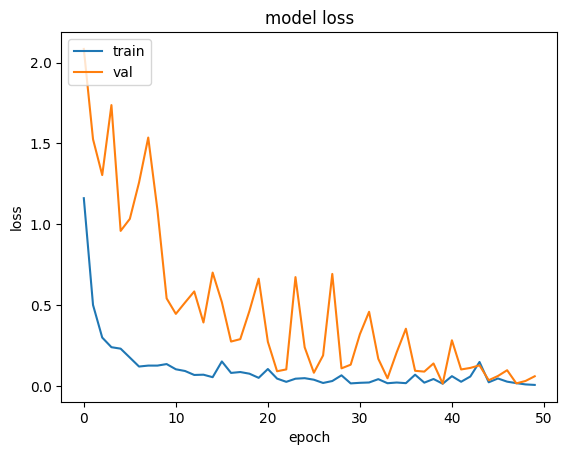

In [22]:
#plot of loss vs epoch

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [27]:
model.load_weights('best_model.h5')

In [28]:
x_test=np.array(x_test).reshape(-1,28,28,3)

loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 1s - loss: 0.2276 - accuracy: 0.9466 - 947ms/epoch - 15ms/step


In [29]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred)


63/63 [==============================] - 1s 9ms/step


In [30]:
print(conf_mat)

[[  60    4    1    0    1    0    1]
 [   0  118    4    0    2    0    1]
 [   1    0  185    0   12    0    2]
 [   0    0    1   21    0    0    0]
 [   2    7   17    2 1314    2   11]
 [   0    0    0    0    1   27    0]
 [   1    2    8    0   23    1  171]]


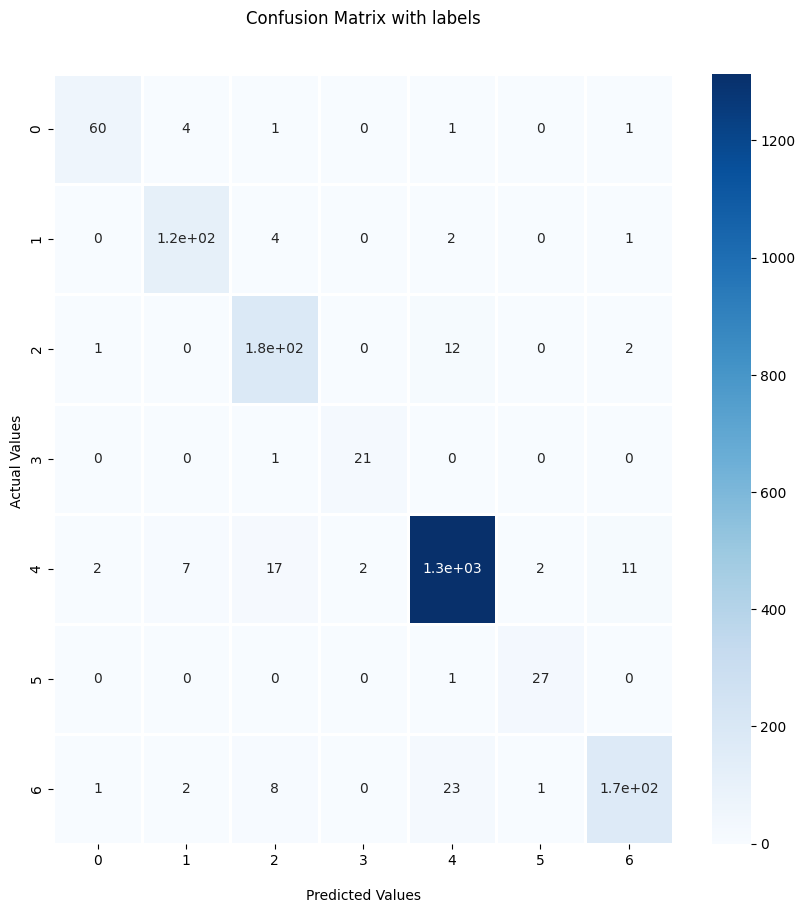

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))


ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

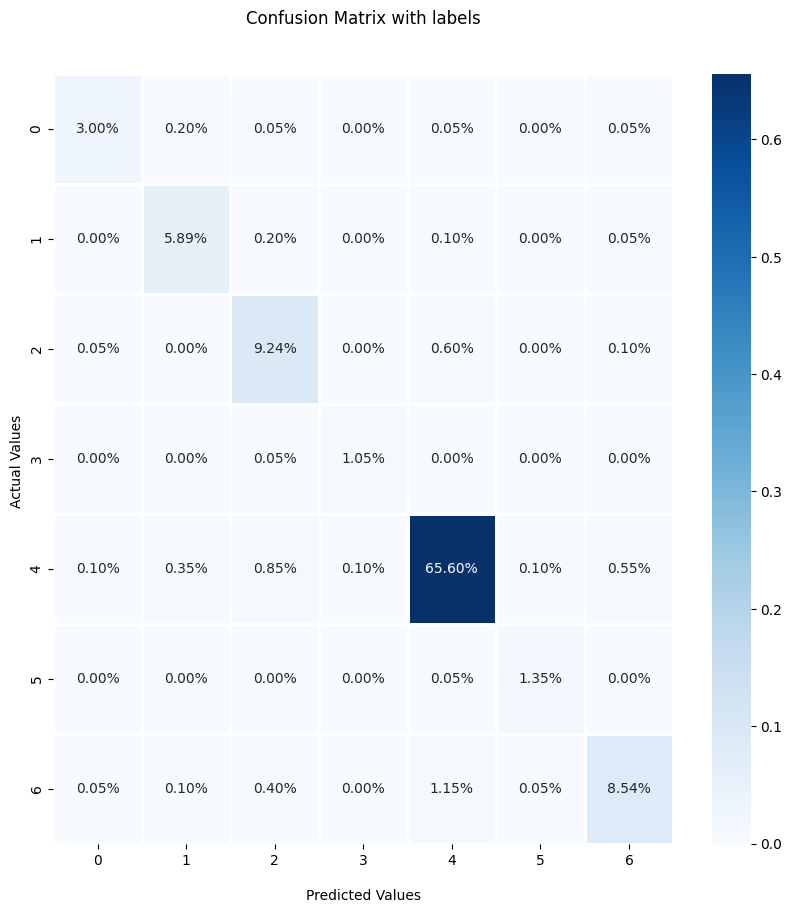

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))


ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

In [34]:
#https://pillow.readthedocs.io/en/stable/

import PIL

image=PIL.Image.open('tester.jpg')

image=image.resize((28,28))

img=x_test[1]

img=np.array(image).reshape(-1,28,28,3)

result=model.predict(img)

print(result[0])

result=result.tolist()

max_prob=max(result[0])

class_ind=result[0].index(max_prob)

print(classes[class_ind])

1/1 [==============================] - 0s 285ms/step
[3.2271601e-05 2.5280088e-04 1.1521421e-03 8.5902386e-05 9.9383920e-01
 5.5270968e-05 4.5823934e-03]
('nv', ' melanocytic nevi')


# Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
#data = pd.read_csv('your_dataset.csv')

# Split data into training and testing sets
X = df[['pixel0006','pixel0005','pixel0004','pixel0003','pixel0002','pixel0001']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train Linear Regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict target variable for test set
y_pred = reg.predict(X_test)

# Compute R2 score
r2 = r2_score(y_test, y_pred)

print('R2 score:', r2)

R2 score: 0.01031002481904486


# Random Forest

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [71]:
# Split the data 8into input (X) and output (y) variables
X = df[['pixel0008','pixel0005','pixel0004','pixel0003','pixel0002','pixel0001']]
y = df['label']

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Create a random forest model and fit it to the training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [74]:
# Use the model to make predictions on the testing data
y_pred = model.predict(X_test)

In [75]:
# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.9590801365103963


In [76]:
y_train_pred=model.predict(X_train)
y_train_pred,y_test

(array([4.  , 3.87, 4.23, ..., 4.  , 2.28, 3.96]),
 1617    6
 8128    4
 2168    6
 1090    2
 7754    4
        ..
 1770    6
 1888    6
 2020    6
 1642    6
 4823    4
 Name: label, Length: 2003, dtype: int64)

In [77]:
model.score(X_train,y_train)

0.8443254467508701

In [78]:

y_test_pred=model.predict(X_test)
y_test_pred,y_test

(array([3.45      , 4.14      , 3.8       , ..., 3.89      , 4.39806993,
        3.94      ]),
 1617    6
 8128    4
 2168    6
 1090    2
 7754    4
        ..
 1770    6
 1888    6
 2020    6
 1642    6
 4823    4
 Name: label, Length: 2003, dtype: int64)

In [79]:
model.score(X_test,y_test)

-0.07623995789724058

In [80]:
from sklearn.metrics import mean_absolute_error

In [81]:
mae=mean_absolute_error

In [82]:
mae_train=mae(y_train,y_train_pred)
print('Training Data MAE',mae_train)

Training Data MAE 0.33920608705221944


In [83]:
mae_test=mae(y_test,y_test_pred)
print('Training Data MAE',mae_test)

Training Data MAE 0.9135294711161817
